<a href="https://colab.research.google.com/github/adithyamadhavan/Sentiment-Analysis-Twitter/blob/adithyamadhavan-Change-1/Financial_Fake_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install WordCloud

In [ ]:
from collections import Counter

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
%matplotlib inline
%matplotlib notebook
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()
import plotly.graph_objects as go
from wordcloud import WordCloud

#NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib
import pickle
from IPython.display import display

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Modeling Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
from IPython.display import display

In [ ]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [ ]:
train_set = pd.read_excel(r"D:\ML Projects\NLP\Financial Sentiment Analysis\all-data.xlsx")
# test_set = pd.read_csv(r"D:\ML Projects\NLP\Sentiment Analysis\Twitter Sentiment Analysis\test.csv")
print("Training Set Data")
# train_set = pd.read_csv(r"/content/train.csv")
# test_set = pd.read_csv(r"/content/test.csv")
# print("Training Set Data")
display(train_set)
display(train_set.shape)

Training Set Data


,Label,Tweets
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


(4846, 2)

In [ ]:
df = pd.read_excel(r"D:\ML Projects\NLP\Financial Sentiment Analysis\all-data.xlsx")
df
# df = pd.read_csv(r"/content/train.csv")
# df

,Label,Tweets
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [ ]:
df.columns

Index(['Label', 'Tweets'], dtype='object')

In [ ]:
df.isnull().sum()

Label     0
Tweets    0
dtype: int64

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



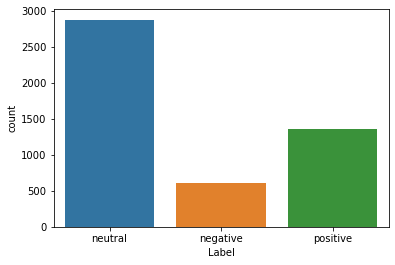

In [ ]:
%matplotlib inline
sns.countplot(df['Label'],data=df)
plt.show()

In [ ]:
print("Postive Tweets")
df[df['Label'] == 'positive']

Postive Tweets


,Label,Tweets
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
...,...,...
4775,positive,"The apartment block will be well-located , in ..."
4780,positive,"The antibody , given at repeated doses of up t..."
4786,positive,Danske Bank A-S DANSKE DC jumped 3.7 percent t...
4787,positive,Our superior customer centricity and expertise...


In [ ]:
print("Negative Tweets")
df[df['Label'] == "negative"]

Negative Tweets


,Label,Tweets
2,negative,The international electronic industry company ...
415,negative,A tinyurl link takes users to a scamming site ...
421,negative,"Compared with the FTSE 100 index , which rose ..."
423,negative,"Compared with the FTSE 100 index , which rose ..."
500,negative,One of the challenges in the oil production in...
...,...,...
4840,negative,HELSINKI Thomson Financial - Shares in Cargote...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [ ]:
print("Neutral Tweets")
df[df['Label'] == "neutral"]

Neutral Tweets


,Label,Tweets
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
58,neutral,At the request of Finnish media company Alma M...
59,neutral,"In Sweden , Gallerix accumulated SEK denominat..."
60,neutral,The company supports its global customers in d...
...,...,...
4819,neutral,"Nevertheless , the development can not be allo..."
4820,neutral,"Besides , as there is no depositor preference ..."
4823,neutral,It holds 38 percent of Outokumpu 's shares and...
4826,neutral,Mobile communication and wireless broadband pr...


In [ ]:
# Checking for any Links in data if any links it will be removed
def removing_hyperlinks(text_list):
   #data is stored in the form of List    
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

## Before Pre-processing

In [ ]:
df['Tweets']

0       According to Gran , the company has no plans t...
1       Technopolis plans to develop in stages an area...
2       The international electronic industry company ...
3       With the new production plant the company woul...
4       According to the company 's updated strategy f...
                              ...                        
4841    LONDON MarketWatch -- Share prices ended lower...
4842    Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843    Operating profit fell to EUR 35.4 mn from EUR ...
4844    Net sales of the Paper segment decreased to EU...
4845    Sales in Finland decreased by 10.5 % in Januar...
Name: Tweets, Length: 4846, dtype: object

## After Pre-Processing

In [ ]:
# Applying RegEx
removed_hyperlinks = removing_hyperlinks(df['Tweets'])
df['Tweets'] = removed_hyperlinks

In [ ]:
df['Tweets']

0       According to Gran , the company has no plans t...
1       Technopolis plans to develop in stages an area...
2       The international electronic industry company ...
3       With the new production plant the company woul...
4       According to the company 's updated strategy f...
                              ...                        
4841    LONDON MarketWatch -- Share prices ended lower...
4842    Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843    Operating profit fell to EUR 35.4 mn from EUR ...
4844    Net sales of the Paper segment decreased to EU...
4845    Sales in Finland decreased by 10.5 % in Januar...
Name: Tweets, Length: 4846, dtype: object

In [ ]:
# Pre-Processing removing lower and upper case and converting into lower case
def preprocess(text):
    review = re.sub('[^a-zA-Z]',' ',text)
    review = review.lower()
    return review
df['Tweets']= df['Tweets'].apply(preprocess)
print("After Preprocessing")
df['Tweets']

After Preprocessing


0       according to gran   the company has no plans t...
1       technopolis plans to develop in stages an area...
2       the international electronic industry company ...
3       with the new production plant the company woul...
4       according to the company  s updated strategy f...
                              ...                        
4841    london marketwatch    share prices ended lower...
4842    rinkuskiai  s beer sales fell by     per cent ...
4843    operating profit fell to eur      mn from eur ...
4844    net sales of the paper segment decreased to eu...
4845    sales in finland decreased by        in januar...
Name: Tweets, Length: 4846, dtype: object

In [ ]:
# Examples of English stopwords
pt_stopwords = stopwords.words('english')
print(f'Total English stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:]

Total English stopwords in the nltk.corpous module: 179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal_data(text, cached_stopwords=stopwords.words('english')):
    """
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('English')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [ ]:
# Removing stopwords and looking at some examples
reviews_stopwords_title = [' '.join(stopwords_removal_data(review_title)) for review_title in df['Tweets']]
df['Tweets'] = reviews_stopwords_title

In [ ]:
df['Tweets']

0       according gran company plans move production r...
1       technopolis plans develop stages area less squ...
2       international electronic industry company elco...
3       new production plant company would increase ca...
4       according company updated strategy years baswa...
                              ...                        
4841    london marketwatch share prices ended lower lo...
4842    rinkuskiai beer sales fell per cent million li...
4843    operating profit fell eur mn eur mn including ...
4844    net sales paper segment decreased eur mn secon...
4845    sales finland decreased january sales outside ...
Name: Tweets, Length: 4846, dtype: object

In [ ]:
print("Neutral Tweets")
df[df['Label'] == "neutral"]

Neutral Tweets


,Label,Tweets
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less squ...
58,neutral,request finnish media company alma media newsp...
59,neutral,sweden gallerix accumulated sek denominated sa...
60,neutral,company supports global customers developing n...
...,...,...
4819,neutral,nevertheless development allowed ruin print ne...
4820,neutral,besides depositor preference finland senior de...
4823,neutral,holds percent outokumpu shares voting rights l...
4826,neutral,mobile communication wireless broadband provid...


In [ ]:
print("Postive Tweets")
Positive_tweets = df[df['Label'] == 'positive']
Positive_tweets

Postive Tweets


,Label,Tweets
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy years baswa...
5,positive,financing aspocomp growth aspocomp aggressivel...
6,positive,last quarter componenta net sales doubled eur ...
7,positive,third quarter net sales increased eur mn opera...
...,...,...
4775,positive,apartment block well located easy reach city c...
4780,positive,antibody given repeated doses mg kg generally ...
4786,positive,danske bank danske dc jumped percent kroner re...
4787,positive,superior customer centricity expertise digital...


In [ ]:
Positive_tweets_words= Positive_tweets['Tweets'].tolist()

In [ ]:
Positive_tweets_words

['new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability',
 'according company updated strategy years basware targets long term net sales growth range operating profit margin net sales',
 'financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs',
 'last quarter componenta net sales doubled eur eur period year earlier moved zero pre tax profit pre tax loss eur',
 'third quarter net sales increased eur mn operating profit eur mn',
 'operating profit rose eur mn eur mn corresponding period representing net sales',
 'operating profit totalled eur mn eur mn representing net sales',
 'teliasonera tlsn said offer line strategy increase ownership core business holdings would strengthen eesti telekom offering customers',
 'stora enso norske skog real upm kymmene credit suisse first boston cfsb rai

In [ ]:
Positive= " ".join(Positive_tweets_words)
Positive

'new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability according company updated strategy years basware targets long term net sales growth range operating profit margin net sales financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs last quarter componenta net sales doubled eur eur period year earlier moved zero pre tax profit pre tax loss eur third quarter net sales increased eur mn operating profit eur mn operating profit rose eur mn eur mn corresponding period representing net sales operating profit totalled eur mn eur mn representing net sales teliasonera tlsn said offer line strategy increase ownership core business holdings would strengthen eesti telekom offering customers stora enso norske skog real upm kymmene credit suisse first boston cfsb raised fair value shares four larges

In [ ]:
Positive_word = word_tokenize(Positive)
Positive_word

['new',
 'production',
 'plant',
 'company',
 'would',
 'increase',
 'capacity',
 'meet',
 'expected',
 'increase',
 'demand',
 'would',
 'improve',
 'use',
 'raw',
 'materials',
 'therefore',
 'increase',
 'production',
 'profitability',
 'according',
 'company',
 'updated',
 'strategy',
 'years',
 'basware',
 'targets',
 'long',
 'term',
 'net',
 'sales',
 'growth',
 'range',
 'operating',
 'profit',
 'margin',
 'net',
 'sales',
 'financing',
 'aspocomp',
 'growth',
 'aspocomp',
 'aggressively',
 'pursuing',
 'growth',
 'strategy',
 'increasingly',
 'focusing',
 'technologically',
 'demanding',
 'hdi',
 'printed',
 'circuit',
 'boards',
 'pcbs',
 'last',
 'quarter',
 'componenta',
 'net',
 'sales',
 'doubled',
 'eur',
 'eur',
 'period',
 'year',
 'earlier',
 'moved',
 'zero',
 'pre',
 'tax',
 'profit',
 'pre',
 'tax',
 'loss',
 'eur',
 'third',
 'quarter',
 'net',
 'sales',
 'increased',
 'eur',
 'mn',
 'operating',
 'profit',
 'eur',
 'mn',
 'operating',
 'profit',
 'rose',
 'eur',


In [ ]:
Positive = " ".join(Positive_word)

In [ ]:
Positive_word

['new',
 'production',
 'plant',
 'company',
 'would',
 'increase',
 'capacity',
 'meet',
 'expected',
 'increase',
 'demand',
 'would',
 'improve',
 'use',
 'raw',
 'materials',
 'therefore',
 'increase',
 'production',
 'profitability',
 'according',
 'company',
 'updated',
 'strategy',
 'years',
 'basware',
 'targets',
 'long',
 'term',
 'net',
 'sales',
 'growth',
 'range',
 'operating',
 'profit',
 'margin',
 'net',
 'sales',
 'financing',
 'aspocomp',
 'growth',
 'aspocomp',
 'aggressively',
 'pursuing',
 'growth',
 'strategy',
 'increasingly',
 'focusing',
 'technologically',
 'demanding',
 'hdi',
 'printed',
 'circuit',
 'boards',
 'pcbs',
 'last',
 'quarter',
 'componenta',
 'net',
 'sales',
 'doubled',
 'eur',
 'eur',
 'period',
 'year',
 'earlier',
 'moved',
 'zero',
 'pre',
 'tax',
 'profit',
 'pre',
 'tax',
 'loss',
 'eur',
 'third',
 'quarter',
 'net',
 'sales',
 'increased',
 'eur',
 'mn',
 'operating',
 'profit',
 'eur',
 'mn',
 'operating',
 'profit',
 'rose',
 'eur',


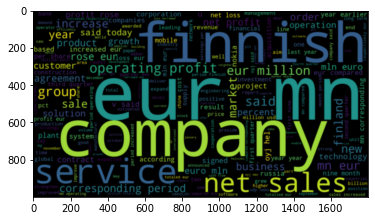

<Figure size 1440x1440 with 0 Axes>

In [ ]:
%matplotlib inline
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Positive), interpolation='gaussian')
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
top = Counter(Positive_word)
temp = pd.DataFrame(top.most_common(50))
temp.columns = ['Common_words',"Counts"]
temp.style.background_gradient(cmap='Blues')

,Common_words,Counts
0,eur,639
1,mn,264
2,company,241
3,said,230
4,year,212
5,finnish,202
6,net,196
7,sales,192
8,profit,192
9,million,170


In [ ]:
temp.dtypes

Common_words    object
Counts           int64
dtype: object

In [ ]:
%matplotlib inline
temp['Counts'].iplot(kind='bar',legend=True)
plt.show()

In [ ]:
print("Negative Tweets")

Negative_tweets =df[df['Label'] == "negative"].reset_index().drop(columns=['index'])
Negative_tweets

Negative Tweets


,Label,Tweets
0,negative,international electronic industry company elco...
1,negative,tinyurl link takes users scamming site promisi...
2,negative,compared ftse index rose points day relative p...
3,negative,compared ftse index rose points day relative p...
4,negative,one challenges oil production north sea scale ...
...,...,...
599,negative,helsinki thomson financial shares cargotec fel...
600,negative,london marketwatch share prices ended lower lo...
601,negative,operating profit fell eur mn eur mn including ...
602,negative,net sales paper segment decreased eur mn secon...


In [ ]:
Negative_tweets_words= Negative_tweets['Tweets'].tolist()
Negative_tweets_words

['international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported',
 'tinyurl link takes users scamming site promising users earn thousands dollars becoming google nasdaq goog cash advertiser',
 'compared ftse index rose points day relative price change',
 'compared ftse index rose points day relative price change',
 'one challenges oil production north sea scale formation plug pipelines halt production',
 'jan ford struggling face slowing truck suv sales surfeit date gotta cars',
 'peer peugeot fell pct sales rose pct period last year',
 'pharmaceuticals group orion corp reported fall third quarter earnings hit larger expenditures r marketing',
 'however growth margin slowed due financial crisis',
 'february finland based steel maker rautaruukki oyj hel rtrks ruukki said today slipped larger expected pretax loss eur fourth quarter year earlier profit eur',
 'adpnews feb fin

In [ ]:
Negative= " ".join(Negative_tweets_words)
Negative

'international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported tinyurl link takes users scamming site promising users earn thousands dollars becoming google nasdaq goog cash advertiser compared ftse index rose points day relative price change compared ftse index rose points day relative price change one challenges oil production north sea scale formation plug pipelines halt production jan ford struggling face slowing truck suv sales surfeit date gotta cars peer peugeot fell pct sales rose pct period last year pharmaceuticals group orion corp reported fall third quarter earnings hit larger expenditures r marketing however growth margin slowed due financial crisis february finland based steel maker rautaruukki oyj hel rtrks ruukki said today slipped larger expected pretax loss eur fourth quarter year earlier profit eur adpnews feb finland based steel maker rautaruukki oyj he

In [ ]:
Negative_word = word_tokenize(Negative)
Negative_word

['international',
 'electronic',
 'industry',
 'company',
 'elcoteq',
 'laid',
 'tens',
 'employees',
 'tallinn',
 'facility',
 'contrary',
 'earlier',
 'layoffs',
 'company',
 'contracted',
 'ranks',
 'office',
 'workers',
 'daily',
 'postimees',
 'reported',
 'tinyurl',
 'link',
 'takes',
 'users',
 'scamming',
 'site',
 'promising',
 'users',
 'earn',
 'thousands',
 'dollars',
 'becoming',
 'google',
 'nasdaq',
 'goog',
 'cash',
 'advertiser',
 'compared',
 'ftse',
 'index',
 'rose',
 'points',
 'day',
 'relative',
 'price',
 'change',
 'compared',
 'ftse',
 'index',
 'rose',
 'points',
 'day',
 'relative',
 'price',
 'change',
 'one',
 'challenges',
 'oil',
 'production',
 'north',
 'sea',
 'scale',
 'formation',
 'plug',
 'pipelines',
 'halt',
 'production',
 'jan',
 'ford',
 'struggling',
 'face',
 'slowing',
 'truck',
 'suv',
 'sales',
 'surfeit',
 'date',
 'got',
 'ta',
 'cars',
 'peer',
 'peugeot',
 'fell',
 'pct',
 'sales',
 'rose',
 'pct',
 'period',
 'last',
 'year',
 'phar

In [ ]:
Negative = " ".join(Negative_word)

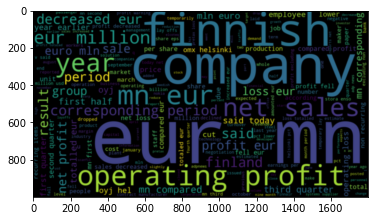

<Figure size 1440x1440 with 0 Axes>

In [ ]:
%matplotlib inline
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Negative), interpolation='gaussian')
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
top = Counter(Negative_word)
temp_1 = pd.DataFrame(top.most_common(50))
temp_1.columns = ['Common_words',"Counts"]
temp_1.style.background_gradient(cmap='Blues')

,Common_words,Counts
0,eur,417
1,mn,237
2,profit,156
3,net,104
4,finnish,102
5,company,100
6,year,100
7,sales,98
8,operating,97
9,period,90


In [ ]:
temp_1.dtypes

Common_words    object
Counts           int64
dtype: object

In [ ]:
%matplotlib inline
temp_1['Counts'].iplot(kind='bar',legend=True)
plt.show()

In [ ]:
print("Neutral Tweets")
Neutral_tweets = df[df['Label'] == 'neutral']
Neutral_tweets

Neutral Tweets


,Label,Tweets
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less squ...
58,neutral,request finnish media company alma media newsp...
59,neutral,sweden gallerix accumulated sek denominated sa...
60,neutral,company supports global customers developing n...
...,...,...
4819,neutral,nevertheless development allowed ruin print ne...
4820,neutral,besides depositor preference finland senior de...
4823,neutral,holds percent outokumpu shares voting rights l...
4826,neutral,mobile communication wireless broadband provid...


In [ ]:
Neutral_tweets_words= Neutral_tweets['Tweets'].tolist()

In [ ]:
Neutral_tweets_words

['according gran company plans move production russia although company growing',
 'technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said',
 'request finnish media company alma media newspapers research manager jari kaivo oja finland futures research centre turku school economics drawn future scenario finland national economy using model developed university denver',
 'sweden gallerix accumulated sek denominated sales eur denominated sales',
 'company supports global customers developing new technologies offers fast route product development applications volume production',
 'investment place atria plans expand moscow market',
 'new agreement continuation theagreement signed earlier year lemminkainen group whereby cramo acquired entire construction machine fleet oflemminkainen talo oy ita ja pohjois suomo signed asimilar agreement said tatu hauhio managing director ofcramo finland',
 'june sold perce

In [ ]:
Neutral= " ".join(Neutral_tweets_words)
Neutral

'according gran company plans move production russia although company growing technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said request finnish media company alma media newspapers research manager jari kaivo oja finland futures research centre turku school economics drawn future scenario finland national economy using model developed university denver sweden gallerix accumulated sek denominated sales eur denominated sales company supports global customers developing new technologies offers fast route product development applications volume production investment place atria plans expand moscow market new agreement continuation theagreement signed earlier year lemminkainen group whereby cramo acquired entire construction machine fleet oflemminkainen talo oy ita ja pohjois suomo signed asimilar agreement said tatu hauhio managing director ofcramo finland june sold percent stake nordstjernan investm

In [ ]:
Neutral_word = word_tokenize(Neutral)
Neutral_word

['according',
 'gran',
 'company',
 'plans',
 'move',
 'production',
 'russia',
 'although',
 'company',
 'growing',
 'technopolis',
 'plans',
 'develop',
 'stages',
 'area',
 'less',
 'square',
 'meters',
 'order',
 'host',
 'companies',
 'working',
 'computer',
 'technologies',
 'telecommunications',
 'statement',
 'said',
 'request',
 'finnish',
 'media',
 'company',
 'alma',
 'media',
 'newspapers',
 'research',
 'manager',
 'jari',
 'kaivo',
 'oja',
 'finland',
 'futures',
 'research',
 'centre',
 'turku',
 'school',
 'economics',
 'drawn',
 'future',
 'scenario',
 'finland',
 'national',
 'economy',
 'using',
 'model',
 'developed',
 'university',
 'denver',
 'sweden',
 'gallerix',
 'accumulated',
 'sek',
 'denominated',
 'sales',
 'eur',
 'denominated',
 'sales',
 'company',
 'supports',
 'global',
 'customers',
 'developing',
 'new',
 'technologies',
 'offers',
 'fast',
 'route',
 'product',
 'development',
 'applications',
 'volume',
 'production',
 'investment',
 'place',
 'a

In [ ]:
Neutral = " ".join(Neutral_word)

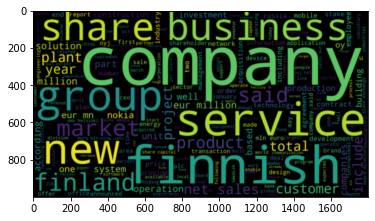

<Figure size 1440x1440 with 0 Axes>

In [ ]:
%matplotlib inline
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(Neutral), interpolation='gaussian')
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
top = Counter(Neutral_word)
temp_2 = pd.DataFrame(top.most_common(50))
temp_2.columns = ['Common_words',"Counts"]
temp_2.style.background_gradient(cmap='Blues')

,Common_words,Counts
0,company,510
1,eur,359
2,said,238
3,finland,228
4,finnish,220
5,business,195
6,million,193
7,group,190
8,new,189
9,sales,165


In [ ]:
%matplotlib inline
temp_2['Counts'].iplot(kind='bar',legend=True)
plt.show()

In [ ]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal_data(text, cached_stopwords=stopwords.words('english')):
    """
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('English')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [ ]:
# Removing stopwords and looking at some examples
reviews_stopwords_title = [' '.join(stopwords_removal_data(review_title)) for review_title in df['Tweets']]
df['Tweets'] = reviews_stopwords_title

In [ ]:
df['Tweets']

0       according gran company plans move production r...
1       technopolis plans develop stages area less squ...
2       international electronic industry company elco...
3       new production plant company would increase ca...
4       according company updated strategy years baswa...
                              ...                        
4841    london marketwatch share prices ended lower lo...
4842    rinkuskiai beer sales fell per cent million li...
4843    operating profit fell eur mn eur mn including ...
4844    net sales paper segment decreased eur mn secon...
4845    sales finland decreased january sales outside ...
Name: Tweets, Length: 4846, dtype: object

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['Tweets'][i])
    review = review.lower()
    review = review.split() #convert into list
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn e

In [ ]:
clean_data = " ".join(corpus)

In [ ]:
All_tweets = clean_data
All_tweets

'accord gran compani plan move product russia although compani grow technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur third quarter net sale increas eur mn oper profit eur mn oper profit rose eur mn eur mn correspond period repres net sale oper profit total eur mn eur mn repres net sale teliasonera tls

All Tweets


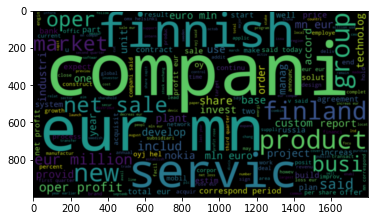

<Figure size 1440x1440 with 0 Axes>

In [ ]:
%matplotlib inline
print("All Tweets")
plt.imshow(WordCloud(width=1800,height=1000).generate_from_text(All_tweets), interpolation='gaussian')
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
df['Tweets']

0       according gran company plans move production r...
1       technopolis plans develop stages area less squ...
2       international electronic industry company elco...
3       new production plant company would increase ca...
4       according company updated strategy years baswa...
                              ...                        
4841    london marketwatch share prices ended lower lo...
4842    rinkuskiai beer sales fell per cent million li...
4843    operating profit fell eur mn eur mn including ...
4844    net sales paper segment decreased eur mn secon...
4845    sales finland decreased january sales outside ...
Name: Tweets, Length: 4846, dtype: object

In [ ]:
corpus

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn e

In [ ]:
corpus

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn e

In [ ]:
All_tweets

'accord gran compani plan move product russia although compani grow technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur third quarter net sale increas eur mn oper profit eur mn oper profit rose eur mn eur mn correspond period repres net sale oper profit total eur mn eur mn repres net sale teliasonera tls

In [ ]:
print(clean_data)

accord gran compani plan move product russia although compani grow technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur third quarter net sale increas eur mn oper profit eur mn oper profit rose eur mn eur mn correspond period repres net sale oper profit total eur mn eur mn repres net sale teliasonera tlsn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


#Creating the bag of words
bow_article = CountVectorizer().fit(corpus)

count_tokens=bow_article.get_feature_names()

article_vect = bow_article.transform(corpus)
count_tokens

['aaland',
 'aalborg',
 'aalto',
 'aaltonen',
 'aaron',
 'aava',
 'aazhang',
 'ab',
 'abb',
 'abbott',
 'aberr',
 'abidjan',
 'abil',
 'abl',
 'abloy',
 'abn',
 'aboavista',
 'abp',
 'abramov',
 'abramovich',
 'abroad',
 'absente',
 'absolut',
 'absorpt',
 'abu',
 'ac',
 'aca',
 'acacia',
 'acanb',
 'acando',
 'acceler',
 'accept',
 'access',
 'accessori',
 'accid',
 'accommod',
 'accomplish',
 'accord',
 'accordingli',
 'account',
 'accumul',
 'acg',
 'achiev',
 'acid',
 'acknowledg',
 'acnielsen',
 'acquir',
 'acquisit',
 'acquit',
 'across',
 'act',
 'action',
 'activ',
 'activis',
 'actor',
 'actual',
 'ad',
 'adac',
 'adak',
 'adam',
 'adanac',
 'adapt',
 'adat',
 'add',
 'addict',
 'addit',
 'address',
 'addu',
 'adequ',
 'adequaci',
 'adida',
 'adjac',
 'adjust',
 'administ',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adp',
 'adpnew',
 'adr',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'advis',
 'advisor',
 'advisori',
 'aero',
 'aeronaut',
 'afe',
 'affair',
 'affarsvarl

In [ ]:
article_vect

<4846x6678 sparse matrix of type '<class 'numpy.int64'>'
	with 54797 stored elements in Compressed Sparse Row format>

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# words = cv.fit_transform(corpus)
# sum_words = words.sum(axis=0)
# len(sum_words)

# words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
# words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

# frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
# plt.title("Most Frequently Occuring Words - Top 30")

In [ ]:
df_count_vect_train=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_count_vect_train

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zero,zgodi,zinc,zip,zloti,zoltan,zone,zoo,zte,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',norm='l2',stop_words= 'english')

In [ ]:
tfidf_tweet = tfidfvectorizer.fit_transform(df_count_vect_train)
tfidf_tweet

<6678x6573 sparse matrix of type '<class 'numpy.float64'>'
	with 6573 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_names= tfidfvectorizer.get_feature_names()

In [ ]:
df_count_tfidf_vect_train=pd.DataFrame(data=tfidf_tweet.toarray(),columns=tfidf_names)

In [ ]:
df_count_tfidf_vect_train

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zero,zgodi,zinc,zip,zloti,zoltan,zone,zoo,zte,zu
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.shape,tfidf_tweet.toarray().shape

((4846, 2), (6678, 6573))

## Feature Engineering

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Label'])

In [ ]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
df['Label']

0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842     neutral
4843    negative
4844    negative
4845    negative
Name: Label, Length: 4846, dtype: object

In [ ]:
# Creating the bag of Word Model
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer()
X=article_vect.toarray()
print(y.shape,X.shape)

(4846,) (4846, 6678)


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X.shape,y.shape

((4846, 6678), (4846,))

In [ ]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 142)



In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Random Forest

Accuracy: 0.73
Detail:
              precision    recall  f1-score   support

           0       0.78      0.39      0.52       159
           1       0.73      0.94      0.82       720
           2       0.69      0.42      0.53       333

    accuracy                           0.73      1212
   macro avg       0.73      0.59      0.62      1212
weighted avg       0.73      0.73      0.70      1212

True Positive
[ 62. 679. 141.]
True Negative
[1035.  242.  817.]
False Positive
[ 18. 250.  62.]
False Negative
[ 97.  41. 192.]
Recall
[0.38993711 0.94305556 0.42342342]
True Negative Rate
[0.98290598 0.49186992 0.9294653 ]
Precision
[0.775      0.73089343 0.69458128]
Negative Predicitve Value
[0.91431095 0.85512367 0.80971259]
False Positive Rate
[0.01709402 0.50813008 0.0705347 ]
False Negative Rate
[0.61006289 0.05694444 0.57657658]
Accuracy per Fault
[0.90511551 0.75990099 0.79042904]
0.7277227722772277


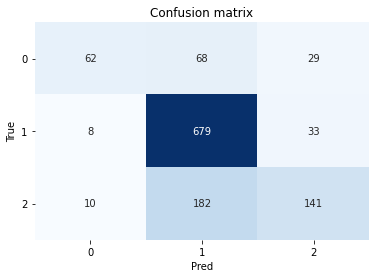

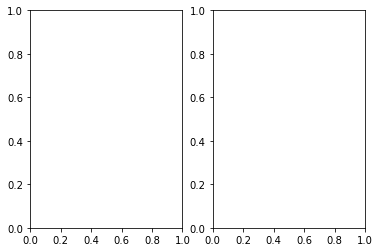

In [ ]:
#########RandomForestClassifier
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =100,criterion="entropy",random_state =0)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
# auc = metrics.roc_auc_score(y_test, y_pred, 
#                             multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred))
classes = np.unique(y_test)



FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print("True Positive")
print(TP)
print("True Negative")
print(TN)
print("False Positive")
print(FP)
print("False Negative")
print(FN)
# Sensitivity, hit rate, recall, or true positive rate
Recall = TP/(TP+FN)
print('Recall')
print(Recall)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("True Negative Rate") 
print(TNR)
# Precision or positive predictive value
Precision = TP/(TP+FP)
print("Precision")
print(Precision)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predicitve Value")
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate")
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate")
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy per Fault")
print(Accuracy)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',penalty='l2')
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Results for Logistic Regression with tfidf")
print(lr_score)
y_pred_lr = lr.predict(X_test)

Results for Logistic Regression with tfidf
0.735973597359736


D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
cmx = confusion_matrix(y_test, y_pred_lr)

In [ ]:
FP = cmx.sum(axis=0) - np.diag(cmx) 
FN = cmx.sum(axis=1) - np.diag(cmx)
TP = np.diag(cmx)
TN = cmx.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print("True Positive")
print(TP)
print("True Negative")
print(TN)
print("False Positive")
print(FP)
print("False Negative")
print(FN)
# Sensitivity, hit rate, recall, or true positive rate
Recall = TP/(TP+FN)
print('Recall')
print(Recall)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("True Negative Rate") 
print(TNR)
# Precision or positive predictive value
Precision = TP/(TP+FP)
print("Precision")
print(Precision)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predicitve Value")
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate")
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate")
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy per Fault")
print(Accuracy)

True Positive
[ 79. 633. 180.]
True Negative
[1025.  300.  779.]
False Positive
[ 28. 192. 100.]
False Negative
[ 80.  87. 153.]
Recall
[0.49685535 0.87916667 0.54054054]
True Negative Rate
[0.97340931 0.6097561  0.88623436]
Precision
[0.73831776 0.76727273 0.64285714]
Negative Predicitve Value
[0.92760181 0.7751938  0.83583691]
False Positive Rate
[0.02659069 0.3902439  0.11376564]
False Negative Rate
[0.50314465 0.12083333 0.45945946]
Accuracy per Fault
[0.91089109 0.76980198 0.79125413]


In [ ]:
#Naive Bayes - gaussain
from sklearn.naive_bayes import MultinomialNB ,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('clf', GaussianNB())
                    ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred_nb = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_nb, y_test))
print(classification_report(y_test, y_pred_nb))

accuracy 0.5255775577557755
              precision    recall  f1-score   support

           0       0.38      0.63      0.47       159
           1       0.73      0.54      0.62       720
           2       0.36      0.45      0.40       333

    accuracy                           0.53      1212
   macro avg       0.49      0.54      0.50      1212
weighted avg       0.58      0.53      0.54      1212



In [ ]:
# Naive Bayes - MultinomialNB
from sklearn.naive_bayes import MultinomialNB ,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

mnb = Pipeline([('clf',MultinomialNB())
                    ])
mnb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred_mnb = mnb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_mnb, y_test))
print(classification_report(y_test, y_pred_mnb))

accuracy 0.6963696369636964
              precision    recall  f1-score   support

           0       0.71      0.46      0.56       159
           1       0.76      0.83      0.79       720
           2       0.53      0.53      0.53       333

    accuracy                           0.70      1212
   macro avg       0.67      0.60      0.63      1212
weighted avg       0.69      0.70      0.69      1212

